In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
q = np.random.random(size=(50,50))
k = np.random.random(size=(50,50))

In [26]:
qk_dp = q @ k.T

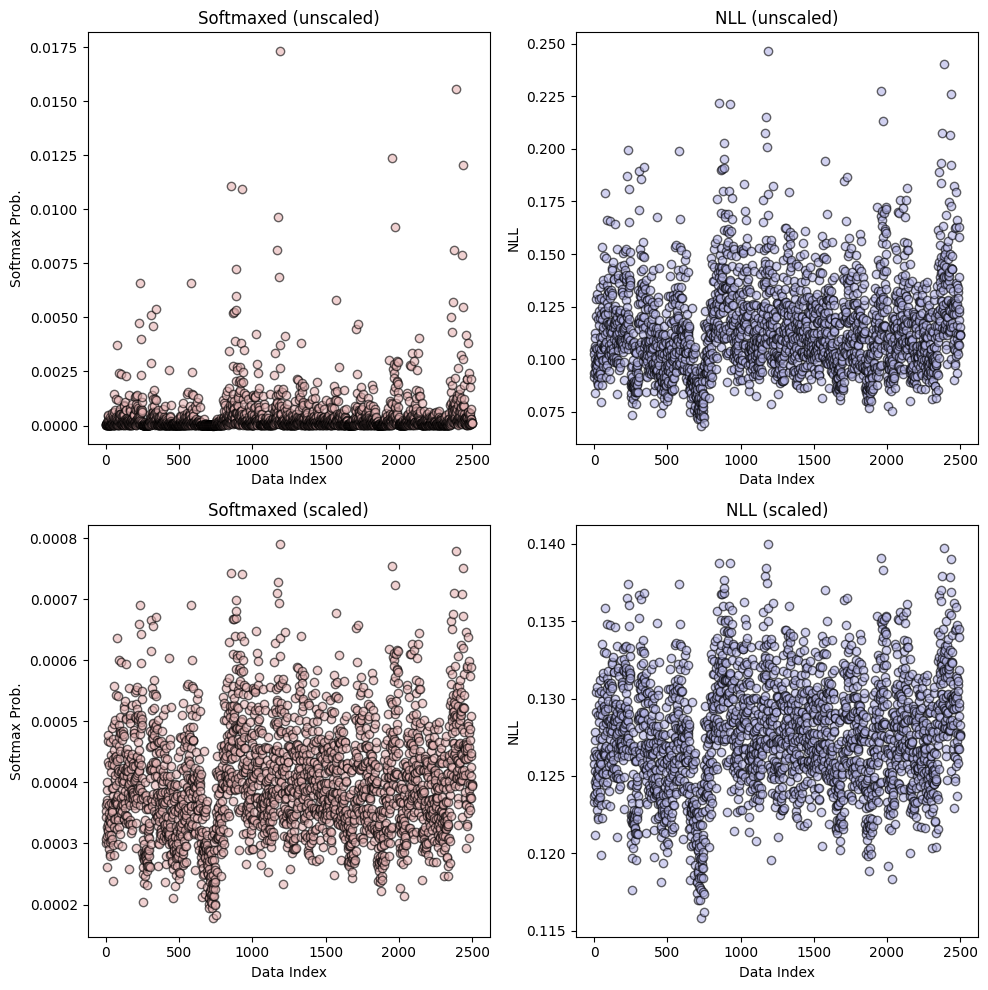

In [27]:
_, axs = plt.subplots(2,2,figsize=(10,10))

for i in range(2):
  if i==1:
    qk_dp /= np.sqrt(qk_dp.shape[-1])

  qk_dp_flat = qk_dp.flatten()
  qk_dp_softmax = np.exp(qk_dp_flat) / np.sum(np.exp(qk_dp_flat))
  nll = -1/np.log(qk_dp_softmax)

  axs[i,0].plot(qk_dp_softmax,'ko',markerfacecolor=[.9,.7,.7],alpha=.6)
  axs[i,0].set(xlabel='Data Index', ylabel='Softmax Prob.', title='Softmaxed (' + (['unscaled)','scaled)'])[i])

  axs[i,1].plot(nll,'ko',markerfacecolor=[.7,.7,.9],alpha=.6)
  axs[i,1].set(xlabel='Data Index', ylabel='NLL', title='NLL (' + (['unscaled)','scaled)'])[i])

plt.tight_layout()
plt.show()

In [28]:
from transformers import AutoModelForCausalLM
gpt2 = AutoModelForCausalLM.from_pretrained('gpt2')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [40]:
ln_weights = np.array([])
ln_biases = np.array([])

for name, mat in gpt2.named_parameters():
  if 'ln' in name:
    if 'weight' in name:
      ln_weights = np.append(ln_weights, mat.data)
    else:
      ln_biases = np.append(ln_biases, mat.data)

In [41]:
yW, xW = np.histogram(ln_weights, bins=np.linspace(0,3,100))
yB, xB = np.histogram(ln_biases, bins=np.linspace(-5,5,100))

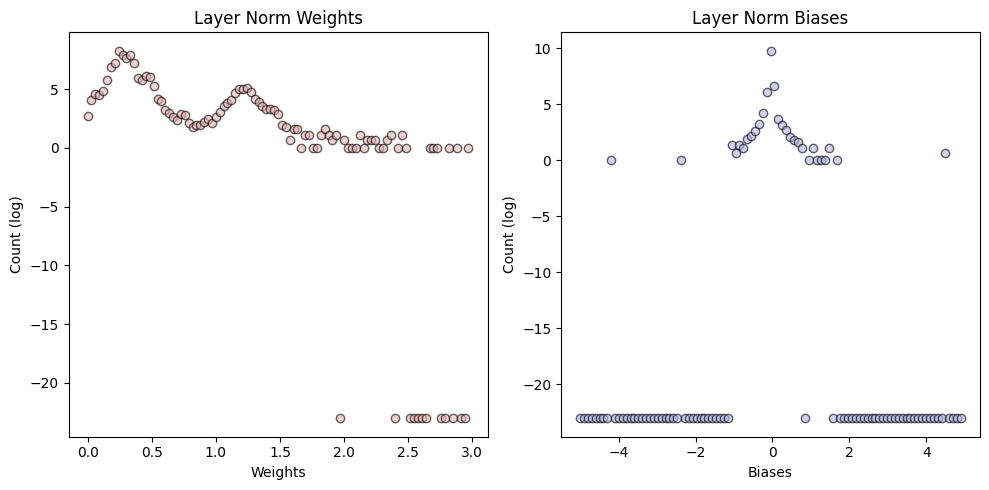

In [45]:
_,axs = plt.subplots(1,2,figsize=(10,5))

# Add a small epsilon to avoid log(0)
epsilon = 1e-10

axs[0].plot(xW[:-1],np.log(yW + epsilon),'ko',markerfacecolor=[.9,.7,.7],alpha=.6)
axs[0].set(xlabel='Weights', ylabel='Count (log)', title='Layer Norm Weights')

axs[1].plot(xB[:-1],np.log(yB + epsilon),'ko',markerfacecolor=[.7,.7,.9],alpha=.6)
axs[1].set(xlabel='Biases', ylabel='Count (log)', title='Layer Norm Biases')

plt.tight_layout()
plt.show()